# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")
print("end")

end


### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [2]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy', 'artists', 'album_name', 'track_name'], axis=1)
columns = X.columns
print("End")

End


## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [3]:
X['explicit'] = X['explicit'].astype(int)

In [4]:
# ваш код здесь 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# One-Hot Encoding для категориальных признаков
X_encoded = pd.get_dummies(X, columns=['track_genre'])
print("end")

end


In [47]:
# 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7. 

In [5]:
# ваш код здесь 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# X_encoded = pd.get_dummies(X, columns=['artists', 'album_name', 'track_genre'])
X_train, X_test, y_train, y_test = train_test_split(pd.concat((X.drop(columns=['track_genre']), X_encoded), axis=1), y, test_size=0.25, random_state=7)
print("end")

end


In [6]:
print(X_train.shape)

(85500, 142)


In [7]:
print(X_train.dtypes)


popularity                   int64
duration_ms                  int64
explicit                     int64
danceability               float64
key                          int64
                            ...   
track_genre_techno           uint8
track_genre_trance           uint8
track_genre_trip-hop         uint8
track_genre_turkish          uint8
track_genre_world-music      uint8
Length: 142, dtype: object


#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей! 

In [8]:
print("Hello")

Hello


In [9]:
X = data.drop('energy', axis=1) 
y = data['energy']

# Удаление столбца с названием трека
X.drop('track_name', axis=1, inplace=True)

# Преобразование столбца explicit в числовой формат
X['explicit'] = X['explicit'].astype(int)

# Определение нечисловых столбцов
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

# Преобразование нечисловых столбцов с помощью LabelEncoder
for col in non_numeric_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания модели
y_pred = model.predict(X_test_scaled)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')


MSE: 0.01481095148096353
R^2: 0.7646687020704666


In [10]:
X_train.shape

(91200, 17)

In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression
ridge_model = Ridge(alpha=0.03)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# ElasticNet Regression
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.4)
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

# Вывод результатов
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R^2: {r2_lr}")
print("-----------")
print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression R^2: {r2_ridge}")
print("-----------")
print(f"Lasso Regression RMSE: {rmse_lasso}")
print(f"Lasso Regression R^2: {r2_lasso}")
print("-----------")
print(f"ElasticNet Regression RMSE: {rmse_elastic}")
print(f"ElasticNet Regression R^2: {r2_elastic}")


Linear Regression RMSE: 0.12170025259202846
Linear Regression R^2: 0.7646687020704666
-----------
Ridge Regression RMSE: 0.12170025363233108
Ridge Regression R^2: 0.7646686980472084
-----------
Lasso Regression RMSE: 0.14798373613042706
Lasso Regression R^2: 0.6520436982694859
-----------
ElasticNet Regression RMSE: 0.12268881141903015
ElasticNet Regression R^2: 0.7608300299609407


#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [54]:
print("hello")

hello


In [11]:
# Разделение данных на признаки и целевую переменную
X = data.drop(['energy', 'track_name', 'artists', 'album_name'], axis=1) 

# Преобразование столбца explicit в числовой формат
X['explicit'] = X['explicit'].astype(int)

# One-Hot Encoding для категориальных признаков
X_encoded = pd.get_dummies(X, columns=['track_genre'])

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(pd.concat((X.drop(columns=['track_genre']), X_encoded), axis=1), data['energy'], test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания модели
y_pred = model.predict(X_test_scaled)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (with One-Hot Encoding): {mse}')
print(f'R^2 (with One-Hot Encoding): {r2}')


MSE (with One-Hot Encoding): 0.012731919140719713
R^2 (with One-Hot Encoding): 0.7977024595367508


In [12]:
X_train.shape

(91200, 142)

#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы 

In [13]:
print("I am a god")

I am a god


In [13]:
# ваш код здесь 
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import statsmodels.api as sm

# Добавляем константу к обучающему набору данных
X_train_const = sm.add_constant(X_train_scaled)

# Обучаем модель OLS
model = sm.OLS(y_train, X_train_const).fit()

# Выводим статистическую сводку модели
print(model.summary())

# Проверяем, какие веса (коэффициенты) равны нулю
zero_coeffs = model.params[model.params == 0]
print("\nZero coefficients:")
print(zero_coeffs)

print("end")

print("end")

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2885.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:42:23   Log-Likelihood:                 70005.
No. Observations:               91200   AIC:                        -1.398e+05
Df Residuals:                   91072   BIC:                        -1.385e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6409      0.000   1716.746      0.0

#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

Backward Elimination. В этом методе начинают с полной модели (включая все независимые переменные) 
и последовательно удаляют наименее важные признаки на основе критерия значимости (например, p-значение).

Backward Elimination:
Включите все независимые переменные в модель.
Обучите модель.
Проверьте p-значение всех независимых переменных.
Удалите переменную с наибольшим p-значением, если оно больше уровня значимости (например, 0.05).
Повторите шаги 2-4, пока все переменные в модели имеют p-значение меньше уровня значимости.

In [14]:
print("I love china")

I love china


In [15]:
def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while (len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]  # исключаем константу
        
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break  # выходим из цикла, если все признаки значимы

    return features

significant_features = backward_elimination(X_train, y_train)

print("Значимые признаки:", significant_features)


Значимые признаки: ['popularity', 'explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity', 'duration_ms', 'explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_g

Применение метода Backward Elimination позволяет сократить количество признаков, исключая менее важные из модели.
Это может помочь улучшить обобщающую способность модели, уменьшив риск переобучения






#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [17]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
# Зададим диапазон для 𝛼
alphas = np.logspace(-4, 3, 100)  # 100 значений в промежутке [10^-4, 10^3]

# Создаем Lasso регрессию с кросс-валидацией на 5 фолдах
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)

# Обучаем модель
lasso_cv.fit(X_train_scaled, y_train)

# Получаем предсказания на тестовых данных
y_pred = lasso_cv.predict(X_test_scaled)

# Рассчитываем RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Лучшее значение 𝛼: {lasso_cv.alpha_}")
print(f"RMSE с этим 𝛼: {rmse}")


Лучшее значение 𝛼: 0.0001
RMSE с этим 𝛼: 0.11278857666616765


## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [18]:
from sklearn.base import BaseEstimator
class MyLinearRegression(BaseEstimator):
    def __init__(self, reg_cf=1.0, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, epsilon=1e-8):
        super().__init__()
        
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = []
        self.reg_cf = reg_cf
        self.epsilon = epsilon
    
    def fit(self, X, y):
        
        self.loss_history = []
        l, d = X.shape

        if self.w0 is None:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = self.w0
        
        # Previous weights for stopping criterion
        w_prev = np.inf * np.ones(d)
        
        # Initialize h_0 for Momentum and G_0 for Adagrad
        h = np.zeros(d)
        G = np.zeros(d)
        for i in range(self.max_iter):
            # Stopping criterion
            weight_dist = np.linalg.norm(self.w - w_prev)
            if weight_dist < self.tolerance:
                break
            
            # Save previous weights
            w_prev = self.w.copy()
            
            # Compute gradient
            if self.gd_type == "StochasticDescent":
                idx = np.random.choice(l, int(self.delta*l), replace=False)
                gradient = self.calc_gradient(X[idx], y[idx])
            else:
                gradient = self.calc_gradient(X, y)
            
            # Update weights
            if self.gd_type == "GradientDescent":
                self.w -= self.eta * gradient
            elif self.gd_type == "Momentum":
                h = self.alpha * h + self.eta * gradient
                self.w -= h
            elif self.gd_type == "Adagrad":
                G += gradient**2
                self.w -= self.eta * gradient / (np.sqrt(G) + self.epsilon)
                
            # Save loss
            self.loss_history.append(self.calc_loss(X, y))
            print(self.calc_loss(X, y))
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        l, d = X.shape
        gradient = -2 * X.T.dot(y - X.dot(self.w)) / l + 2 * self.reg_cf * self.w
        return gradient

    def calc_loss(self, X, y):
        l = len(y)
        return np.sum((y - X.dot(self.w)) ** 2) / l + self.reg_cf * np.sum(self.w**2)

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [19]:
y_test

113186    0.598
42819     0.997
59311     0.803
91368     0.511
61000     0.941
          ...  
91204     0.882
102335    0.167
107757    0.728
86528     0.751
86389     0.757
Name: energy, Length: 22800, dtype: float64

In [20]:
y_pred

array([0.63644601, 1.0133417 , 0.52440586, ..., 0.56922391, 0.80848702,
       0.70688057])

In [21]:
my_ridge = MyLinearRegression(gd_type='GradientDescent')
my_ridge.fit(X_train_scaled, y_train.to_numpy())
y_pred = my_ridge.predict(X_test_scaled)


print("RMSE = {:.3f}".format(mean_squared_error(y_test, y_pred, squared=False)))
print("R^2 = {:.3f}".format(r2_score(y_test.to_numpy(), y_pred)))

0.4662582115941929
0.46008404417301524
0.4552155937390991
0.45136440040569786
0.44830751419253856
0.4458723503602588
0.44392508696411664
0.442361769717093
0.4411014870550854
0.4400811290761903
0.43925135898652995
0.4385735133573476
0.43801721437764934
0.4375585283199904
0.43717854339137
0.43686226988623256
0.43659778828044
0.43637558826954714
0.4361880550312519
0.43602906914816053
0.4358936944007596
0.43577793359433503
0.43567853714668014
0.4355928526632565
0.435518706412954
0.43545430968156695
0.43539818456734597
0.4353491050048871
0.4353060497453192
0.4352681647474206
0.43523473299575
0.43520515019632056
0.43517890513701
0.4351555637612267
0.4351347562065691
0.4351161662185112
0.4350995224727352
0.435084591436399
0.4350711714744103
0.4350590879663492
0.4350481892465936
0.43503834321726725
0.4350294345129746
0.4350213621195989
0.435014037367999
0.435007382238271
0.4350013279221162
0.43499581360040623
0.4349907854007316
0.43498619550593987
0.4349820013897209
0.43497816515940285
0.43497

In [22]:
X_train

,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
84744,28,293960,0,0.640,9,-10.663,0,0.0396,0.3960,0.024700,...,0,0,0,0,0,0,0,0,0,0
89295,1,147133,1,0.835,7,-5.620,0,0.0694,0.2260,0.000002,...,0,0,0,0,0,0,0,0,0,0
66688,11,98386,0,0.786,9,-16.516,1,0.5730,0.6790,0.000000,...,0,0,0,0,0,0,0,0,0,0
51391,61,232173,0,0.709,0,-5.817,1,0.2450,0.0698,0.000000,...,0,0,0,0,0,0,0,0,0,0
95123,37,360320,0,0.786,0,-6.742,1,0.0456,0.5110,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,49,162613,0,0.554,4,-30.566,1,0.0502,0.9150,0.000970,...,0,0,0,0,0,0,0,0,0,0
110268,30,240062,0,0.689,9,-8.200,1,0.0759,0.0910,0.914000,...,0,0,0,0,0,0,1,0,0,0
103694,0,136306,0,0.629,0,-11.455,0,0.0523,0.5950,0.000000,...,0,0,0,0,0,0,0,0,0,0
860,44,216841,0,0.421,6,-15.191,1,0.0335,0.9480,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [22]:
np.sqrt(0.47)

0.6855654600401044

In [23]:

# Значения MSE для моделей Sklearn
mse_sklearn_linear = 0.12170025259202846 ** 2
mse_sklearn_ridge = 0.12170025363233108 ** 2
mse_sklearn_lasso = 0.14798373613042706 ** 2
mse_sklearn_elasticnet = 0.12268881141903015 ** 2

# Обучение и валидация "ручных" моделей
# Предполагаем, что у вас есть класс MyLinearRegression с различными типами градиентного спуска

model_full_gd = MyLinearRegression(gd_type='GradientDescent')
model_full_gd.fit(X_train_scaled, y_train)
predictions_full_gd = model_full_gd.predict(X_test_scaled)
print(predictions_full_gd.shape, y_test.shape)
mse_full_gd = ((predictions_full_gd - y_test) ** 2).mean()

# Аналогично для других типов градиентного спуска, например:
model_stochastic_gd = MyLinearRegression(gd_type='Stochastic')
model_stochastic_gd.fit(X_train_scaled, y_train)
predictions_stochastic_gd = model_stochastic_gd.predict(X_test_scaled)
mse_stochastic_gd = ((predictions_stochastic_gd - y_test) ** 2).mean()

# Вывод MSE для различных моделей
print(f"MSE of Sklearn Linear Regression: {mse_sklearn_linear}")
print(f"MSE of Handmade Full Gradient Descent: {mse_full_gd}")
print(f"MSE of Handmade Stochastic Gradient Descent: {mse_stochastic_gd}")
# ... и так далее для других моделей

# Исследование влияния max_iter и alpha на процесс оптимизации
iterations = [100, 500, 1000, 5000]
alphas = [0.01, 0.05, 0.1, 0.5]


for it in iterations:
    for al in alphas:
        model = MyLinearRegression(gd_type='Momentum', max_iter=it, alpha=al)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = ((predictions - y_test) ** 2).mean()
        print(f"For max_iter={it} and alpha={al}, MSE is: {mse}")


0.4662582115941929
0.46008404417301524
0.4552155937390991
0.45136440040569786
0.44830751419253856
0.4458723503602588
0.44392508696411664
0.442361769717093
0.4411014870550854
0.4400811290761903
0.43925135898652995
0.4385735133573476
0.43801721437764934
0.4375585283199904
0.43717854339137
0.43686226988623256
0.43659778828044
0.43637558826954714
0.4361880550312519
0.43602906914816053
0.4358936944007596
0.43577793359433503
0.43567853714668014
0.4355928526632565
0.435518706412954
0.43545430968156695
0.43539818456734597
0.4353491050048871
0.4353060497453192
0.4352681647474206
0.43523473299575
0.43520515019632056
0.43517890513701
0.4351555637612267
0.4351347562065691
0.4351161662185112
0.4350995224727352
0.435084591436399
0.4350711714744103
0.4350590879663492
0.4350481892465936
0.43503834321726725
0.4350294345129746
0.4350213621195989
0.435014037367999
0.435007382238271
0.4350013279221162
0.43499581360040623
0.4349907854007316
0.43498619550593987
0.4349820013897209
0.43497816515940285
0.43497

KeyboardInterrupt: 

In [ ]:
print("dam")

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

In [24]:
print("Hello world!")

Hello world!


In [27]:
model_full_gd = MyLinearRegression(gd_type='GradientDescent').fit(X_train, y_train)
# model_sgd = LinReg(gd_type='StochasticDescent').fit(X_train, y_train)
# model_momentum = MyLinearRegression(gd_type='Momentum').fit(X_train, y_train)
model_adagrad = MyLinearRegression(gd_type='Adagrad').fit(X_train, y_train)


2.2210385346915976e+18
1.439292800163331e+37
9.327005057522061e+55
6.044150525394827e+74
3.916772356005945e+93
2.5381739955542066e+112
1.6448051217040998e+131
1.0658780261411119e+150
6.90717673248393e+168
4.476036586145994e+187
2.90059228198044e+206
1.8796619340255567e+225
1.218071567029194e+244
7.893431874887312e+262
5.1151564858745507e+281
3.3147591934284776e+300
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 

In [28]:
loss_history_full_gd = model_full_gd.loss_history
# loss_history_sgd = model_sgd.loss_history
loss_history_momentum = model_momentum.loss_history
loss_history_adagrad = model_adagrad.loss_history


NameError: name 'model_momentum' is not defined

NameError: name 'loss_history_momentum' is not defined

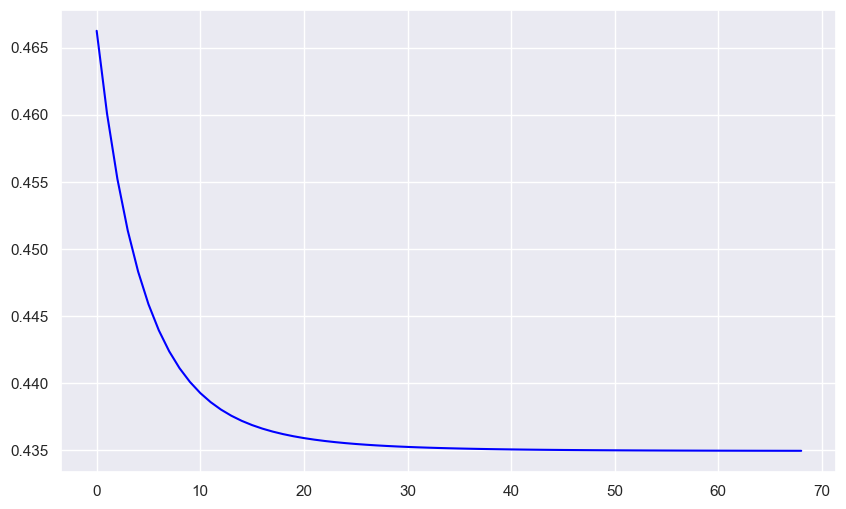

In [29]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))

# Отображаем истории потерь для каждой модели
plt.plot(loss_history_full_gd, label='Full Gradient Descent', color='blue')
# plt.plot(loss_history_sgd, label='Stochastic Gradient Descent', color='green')
plt.plot(loss_history_momentum, label='Momentum', color='red')
plt.plot(loss_history_adagrad, label='Adagrad', color='purple')

plt.title('Loss History for Different Gradient Descent Types')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
print("end my life")